### FIFA 2018 Dataset Project




##### FIFA 2018 Dataset Project
+ Data cleaning
+ Apply statistical functions
+ Viualize graphs
+ Data Analysis


##### **Part 1**
+ ###### Import dataset from kaggle
+ ###### Display the dataframe

###### Import dataset from kaggle

In [268]:
df_fifa = pd.read_csv("CompleteDataset.csv")

C:\Users\2121w\AppData\Local\Temp\ipykernel_23212\3388647961.py:1: DtypeWarning: Columns (23,36) have mixed types. Specify dtype option on import or set low_memory=False.


###### Display the dataframe

In [260]:
display(df_fifa.head())

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,96,83,94,23,91,92,31,80,85,88
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,95,88,85,26,87,73,28,59,90,85
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,88,81,80,33,90,78,24,53,80,83
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,93,83,87,38,77,89,45,80,84,88
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,85,55,25,11,61,44,10,83,70,11


In [269]:
display(df_fifa.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 48 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          17981 non-null  int64 
 1   Name                17981 non-null  object
 2   Age                 17981 non-null  int64 
 3   Photo               17981 non-null  object
 4   Nationality         17981 non-null  object
 5   Flag                17981 non-null  object
 6   Overall             17981 non-null  int64 
 7   Potential           17981 non-null  int64 
 8   Club                17733 non-null  object
 9   Club Logo           17981 non-null  object
 10  Value               17981 non-null  object
 11  Wage                17981 non-null  object
 12  Special             17981 non-null  int64 
 13  Acceleration        17981 non-null  object
 14  Aggression          17981 non-null  object
 15  Agility             17981 non-null  object
 16  Balance             17

None

 ##### **Part 2** Data Cleaning
+ ###### Remove missing value
+ ###### Hadle dollar sign and uint in Value and Wage
+ ###### \+ and - sign need to be calculated in some columns
+ ###### Remove the used column

###### Remove missing value

In [270]:
check_nan = df_fifa.isnull().values.any()

if check_nan:
    print(df_fifa.isnull().sum())
    


Unnamed: 0              0
Name                    0
Age                     0
Photo                   0
Nationality             0
Flag                    0
Overall                 0
Potential               0
Club                  248
Club Logo               0
Value                   0
Wage                    0
Special                 0
Acceleration            0
Aggression              0
Agility                 0
Balance                 0
Ball control            0
Composure               0
Crossing                0
Curve                   0
Dribbling               0
Finishing               0
Free kick accuracy      0
GK diving               0
GK handling             0
GK kicking              0
GK positioning          0
GK reflexes             0
Heading accuracy        0
ID                      0
Interceptions           0
Jumping                 0
Long passing            0
Long shots              0
Marking                 0
Penalties               0
Positioning             0
Reactions   

+ ###### There are 248 missing value in Club.

In [271]:
df_fifa_1 = df_fifa.dropna()

+ ###### Before cleansing:  17981 
+ ###### Before cleansing:  17733

In [272]:
df_fifa_1.isnull().values.any()

False

###### Handle dollar sign and uint in Value 


In [274]:
for i in df_fifa_1.columns[10:12]:
    print(df_fifa_1.loc[:,i].unique()[:20])

['€95.5M' '€105M' '€123M' '€97M' '€61M' '€92M' '€64.5M' '€90.5M' '€79M'
 '€77M' '€52M' '€83M' '€59M' '€67.5M' '€57M' '€69.5M' '€66.5M' '€38M'
 '€4.5M' '€75M']
['€565K' '€280K' '€510K' '€230K' '€355K' '€215K' '€295K' '€340K' '€275K'
 '€310K' '€285K' '€190K' '€265K' '€370K' '€325K' '€225K' '€110K' '€82K'
 '€150K' '€165K']


In [275]:
Val = df_fifa_1["Value"]

val_lst = []
for i in Val:
    if re.search("^€*", i):  
        val_lst.append(i[1:])
    else:
        val_lst.append(i)
        
val_lst_1 = []
for i in val_lst:
    if re.search("K$", i):  
        val_lst_1.append(int(float(i[:-1])*1000))
    elif re.search("M$", i):
        val_lst_1.append(int(float(i[:-1])*1000000))
    else:
        val_lst_1.append(int(i))

df_fifa_1["Value"] = val_lst_1



C:\Users\2121w\AppData\Local\Temp\ipykernel_23212\3136911875.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [276]:
df_fifa_1["Value"] 


0         95500000
1        105000000
2        123000000
3         97000000
4         61000000
           ...    
17976        50000
17977            0
17978        60000
17979        60000
17980        50000
Name: Value, Length: 17733, dtype: int64

###### Handle dollar sign and uint in Wage


In [277]:
Wage = df_fifa_1["Wage"]

wage_lst = []
for i in Wage:
    if re.search("^€*", i):  
        wage_lst.append(i[1:])
    else:
        wage_lst.append(i)
        
wage_lst_1 = []
for i in wage_lst:
    if re.search("K$", i):  
        wage_lst_1.append(int(float(i[:-1])*1000))
    elif re.search("M$", i):
        wage_lst_1.append(int(float(i[:-1])*1000000))
    else:
        wage_lst_1.append(int(i))

df_fifa_1["Wage"] = wage_lst_1


C:\Users\2121w\AppData\Local\Temp\ipykernel_23212\2264045977.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [278]:
df_fifa_1["Wage"] 

0        565000
1        565000
2        280000
3        510000
4        230000
          ...  
17976      1000
17977      1000
17978      1000
17979      1000
17980      1000
Name: Wage, Length: 17733, dtype: int64

###### Handle Columns Acceleration to Volleys
+ ###### \+ and - sign need to be calculated in these column

In [282]:
for i in df_fifa_1.columns[13:15]:
    print(df_fifa_1.loc[:,i].unique()[:100])

['89' '92' '94' '88' '58' '79' '57' '93' '60' '78' '75' '76' '46' '90'
 '68' '49' '43' '87' '77' '95' '62' '72' '65' '70' '63' '82' '69' '67'
 '54' '55' '74' '86' '84' '48' '80' '71' '85' '40' '51' '38' '53' '73'
 '45' '61' '64' '44' '42' '81' '91' '59' '52' '66' '39' '34' '50' '83'
 '47' '96' '31' '30' '70+9' '56' '26' '80+1' '35' '36' '32' '49-1' '41'
 '67+2' '37' '28' '33' '20' '79-2' '65-2' '29' '91-2' '74-3' '75+1' '41-6'
 '74+1' '70+3' '17' '75+5' '74+2' '71+2' '68+1' '71+4' '89-2' '25' '27'
 '24' '58-10' '78+1' '86+1' '66-1' '22' '66+1' '15']
['63' '48' '56' '78' '29' '80' '38' '54' '60' '50' '84' '68' '23' '62'
 '65' '92' '34' '69' '57' '43' '82' '86' '66' '31' '77' '47' '90' '89'
 '75' '44' '93' '67' '51' '25' '72' '58' '74' '85' '55' '49' '81' '88'
 '91' '59' '83' '45' '52' '94' '17' '61' '87' '70' '32' '28' '73' '41'
 '71' '79' '35' '36' '20' '26' '40' '58-10' '30' '39' '33' '64' '27' '76'
 '46' '18' '42' '37' '11' '22' '53' '15' '65+10' '57+5' '24' '19' '66+7'
 '96' '77+5' 

###### Handle \+ and - sign function

In [257]:
def arith(col):
    arith_lst = []
    for i in df_fifa_1.loc[:,col]:
        i = str(i)
        if re.search("\+", i):
            index = re.search("\+", i).start()
            arith_lst.append(int(int(i[0:index]) + int(i[index+1:])))
        else: 
            arith_lst.append(i)
    
    arith_lst_1 = []
    for i in arith_lst:
        i = str(i)
        if re.search("\-", i):
            index = re.search("\-", i).start()
            arith_lst_1.append(int(int(i[0:index]) + int(i[index+1:])))
        else: 
            arith_lst_1.append(int(i))
    return arith_lst_1
        

###### Apply calculation to these columns

In [284]:
arith_dict = {}
cols = df_fifa_1.columns[13:]
for k in cols:
    arith_lst_1 = arith(k)
    df_fifa_1.loc[:,k] = arith_lst_1

C:\Users\2121w\AppData\Local\Temp\ipykernel_23212\3911459210.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [288]:
for i in df_fifa_1.columns[13:15]:
    print(df_fifa_1.loc[:,i].unique()[:100])

[89 92 94 88 58 79 57 93 60 78 75 76 46 90 68 49 43 87 77 95 62 72 65 70
 63 82 69 67 54 55 74 86 84 48 80 71 85 40 51 38 53 73 45 61 64 44 42 81
 91 59 52 66 39 34 50 83 47 96 31 30 56 26 35 36 32 41 37 28 33 20 29 17
 25 27 24 22 15 21 23 18 19 16 13 14 12 11]
[ 63  48  56  78  29  80  38  54  60  50  84  68  23  62  65  92  34  69
  57  43  82  86  66  31  77  47  90  89  75  44  93  67  51  25  72  58
  74  85  55  49  81  88  91  59  83  45  52  94  17  61  87  70  32  28
  73  41  71  79  35  36  20  26  40  30  39  33  64  27  76  46  18  42
  37  11  22  53  15  24  19  96  21  12  16  13  14 106  95]


###### Drop used columns in the dataset

In [306]:
df_fifa_1.drop(columns=['Unnamed: 0','Flag', 'Club Logo', 'ID', 'Photo' ])

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Acceleration,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,95500000,565000,2228,89,...,96,83,94,23,91,92,31,80,85,88
1,L. Messi,30,Argentina,93,93,FC Barcelona,105000000,565000,2154,92,...,95,88,85,26,87,73,28,59,90,85
2,Neymar,25,Brazil,92,94,Paris Saint-Germain,123000000,280000,2100,94,...,88,81,80,33,90,78,24,53,80,83
3,L. Suárez,30,Uruguay,92,92,FC Barcelona,97000000,510000,2291,88,...,93,83,87,38,77,89,45,80,84,88
4,M. Neuer,31,Germany,92,92,FC Bayern Munich,61000000,230000,1493,58,...,85,55,25,11,61,44,10,83,70,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17976,A. Kelsey,17,England,46,63,Scunthorpe United,50000,1000,755,24,...,40,19,19,10,32,28,11,50,26,6
17977,B. Richardson,47,England,46,46,Wycombe Wanderers,0,1000,832,25,...,51,12,13,13,25,32,12,47,17,12
17978,J. Young,17,Scotland,46,61,Swindon Town,60000,1000,1194,66,...,54,42,42,14,51,33,17,32,37,33
17979,J. Lundstram,18,England,46,64,Crewe Alexandra,60000,1000,1302,57,...,49,49,43,47,58,49,48,46,51,25


 ##### **Part 3**
+ ###### Apply five statistical functions on the dataset to answer questions

1. Find the average age in every nationality groups

###### In the FIFA World Cup in Qatar 2022, the average age of the national teams in Argentina is **27.7** years. The youngest team on average is currently the United States at **24.5** years of age. <br>Does the average age similar to this FIFA 2018 dataset?

In [307]:
#1
display(df_fifa_1.groupby('Nationality')["Age"].mean().reset_index(name='Age average')[:10])


,Nationality,Age average
0,Afghanistan,22.000000
1,Albania,24.685714
2,Algeria,26.543860
3,Angola,25.600000
4,Antigua & Barbuda,22.400000
5,Argentina,25.932642
6,Armenia,26.071429
7,Australia,24.276786
8,Austria,24.515038
9,Azerbaijan,25.000000


+ ###### Argentina               25.932642
+ ###### United States           25.272966


In [308]:
display(df_fifa_1.groupby('Nationality')["Age"].mean().sort_values(ascending=False).reset_index(name='Age average')[:3])
display(df_fifa_1.groupby('Nationality')["Age"].mean().sort_values().reset_index(name='Age average')[:3])

,Nationality,Age average
0,Oman,35.0
1,Puerto Rico,34.5
2,Eritrea,32.0


,Nationality,Age average
0,Hong Kong,17.0
1,Brunei Darussalam,19.0
2,Swaziland,20.0


Summary 1 : 

+ ###### Most of nationalities have the average age that is above 20 and below 30.
+ ###### The average age range in different nationalities is between 17 to 35.

2. Find the potential in every clubs (Order by descending order)

In [309]:
#2
display(df_fifa_1.groupby('Club')["Potential"].mean().sort_values(ascending=False).reset_index(name='Potential average')[:10])

,Club,Potential average
0,Real Madrid CF,85.961538
1,FC Barcelona,85.560000
2,FC Bayern Munich,84.500000
3,Juventus,84.038462
4,Paris Saint-Germain,83.357143
5,Manchester United,83.235294
6,Chelsea,82.606061
7,Manchester City,82.363636
8,Liverpool,82.031250
9,Atlético Madrid,81.968750


Summary 2 : 

+ ###### The clubs have the most highest potential rating is Real Madrid CF, FC Barcelona and FC Bayern Munich.
+ ###### The top three clubs got the average potential rating above 84.5

3. Find the average wage in every club (Order by descending order)

In [310]:
#3
display(df_fifa_1.groupby('Club')["Wage"].mean().sort_values(ascending=False).reset_index(name='Wage average')[:10])

,Club,Wage average
0,FC Barcelona,191680.000000
1,Real Madrid CF,182730.769231
2,FC Bayern Munich,125884.615385
3,Juventus,121730.769231
4,Manchester United,107441.176471
5,Chelsea,107181.818182
6,Manchester City,95515.151515
7,Arsenal,91121.212121
8,Liverpool,83250.000000
9,Paris Saint-Germain,78500.000000


Summary 3 : 

+ ###### The clubs have the most highest wage rating is FC Barcelona, Real Madrid CF and FC Bayern Munich.
+ ###### The top three clubs are similar to the second statiscal function.

4. In every age group, find the average overall, potential, value , wage and special 
+ ###### Order by Wage in both descending and ascending order

###### Player salaries depend on age, position, and other factors. In general, players over **26** years old command the highest salaries.

In [311]:
#4
col_lst = ["Overall", "Potential", "Value", "Wage", "Special"]

display(df_fifa_1.groupby('Age')[col_lst].mean().sort_values(by="Wage",ascending=False)[:3])
display(df_fifa_1.groupby('Age')[col_lst].mean().sort_values(by="Wage")[:3])

,Overall,Potential,Value,Wage,Special
Age,,,,,
30,69.871959,69.878361,3.607939e+06,19393.085787,1686.676056
31,69.798771,69.798771,3.036083e+06,17393.241167,1678.764977
28,69.071359,69.319648,3.383226e+06,17129.032258,1670.641251


,Overall,Potential,Value,Wage,Special
Age,,,,,
47,46.000000,46.000000,0.000000,1000.000000,832.000000
43,55.000000,55.000000,10000.000000,1000.000000,1044.000000
16,57.846154,76.538462,331153.846154,1846.153846,1397.692308


Summary 4 : 

+ ###### The Age group have the highest wage is 30 and the lowest wage is 47.
+ ###### Generally, for age groups with highest wage, the overall, potential rating, value, and special rating is higher than that with lower wage.

5. In every age group, find the average overall, potential, value , wage and special 
+ ###### Order by Potential descending and ascending order

In [312]:
#5
col_lst = ["Overall", "Potential", "Value", "Wage", "Special"]

display(df_fifa_1.groupby('Age')[col_lst].mean().sort_values(by="Potential",ascending=False)[:3])
display(df_fifa_1.groupby('Age')[col_lst].mean().sort_values(by="Potential")[:3])

,Overall,Potential,Value,Wage,Special
Age,,,,,
16,57.846154,76.538462,331153.846154,1846.153846,1397.692308
17,56.089147,73.492248,322519.379845,2174.418605,1339.403101
19,59.420263,72.806754,719863.976548,3577.861163,1437.559099


,Overall,Potential,Value,Wage,Special
Age,,,,,
47,46.000000,46.000000,0.000000,1000.0,832.000000
43,55.000000,55.000000,10000.000000,1000.0,1044.000000
41,64.333333,64.333333,26666.666667,2000.0,1125.333333


Summary 5 : 

+ ###### The Age group have the highest potential is 16 and the lowest potential is 47.
+ ###### Generally, for age groups with highest potential, the value rating is much higher than that with lower potential.

 ##### **Part 4**
+ ###### Create 5 graphs where they visualises different information using matplotlib, seaborn and ggplot
+ ###### Cleansing unused columns from the DataFrame


Graph 1. Group the players by Age and find the average players of potential

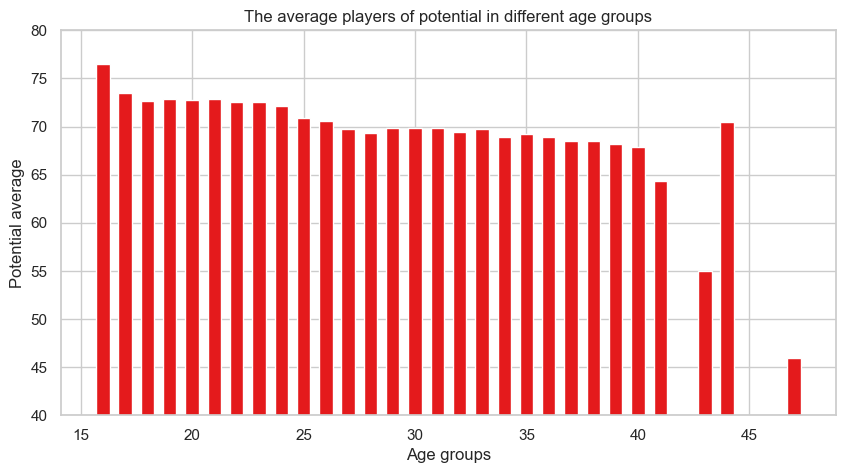

In [313]:
courses = list(df_fifa_1.groupby('Age')["Potential"].mean().keys())
values = list(df_fifa_1.groupby('Age')["Potential"].mean().values)
  
fig = plt.figure(figsize = (10, 5))

plt.bar(courses, values, width = 0.6)
plt.ylim(40,80) 
plt.xlabel("Age groups")
plt.ylabel("Potential average")
plt.title("The average players of potential in different age groups")
plt.show()

Summary 1 : 

+ ###### There is a **decreasing** trend when **increasing** the age groups.

Graph 2. Show the proportion of nationality in the 5 biggest clubs

In [314]:
display(df_fifa_1.groupby('Club').size().sort_values(ascending=False).reset_index(name='count')[:5] )

,Club,count
0,Villarreal CF,35
1,OGC Nice,34
2,Manchester United,34
3,VfL Wolfsburg,34
4,UD Las Palmas,34


In [315]:
club_lst = ['Villarreal CF', 'OGC Nice', 'Manchester United', 'VfL Wolfsburg', 'UD Las Palmas']

In [316]:
pie_lst = {}

for index, row in df_fifa_1.iterrows():
    if row['Club'] in club_lst:
        if row['Nationality'] not in pie_lst.keys():
            pie_lst[row['Nationality']] = 1
        else: 
            pie_lst[row['Nationality']] = pie_lst[row['Nationality']] + 1

pie_lst_1 = { 'Other' : 0}
for key , value in pie_lst.items():
    if value < 3:
        pie_lst_1['Other'] = pie_lst_1['Other'] + 1
    else:
        pie_lst_1[key] = value


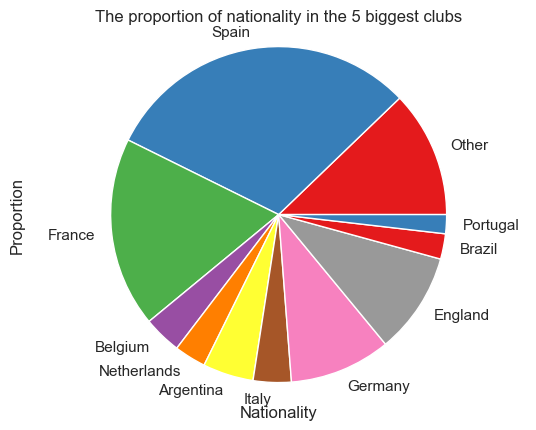

In [317]:
labels = list(pie_lst_1.keys())
values = list(pie_lst_1.values())

plt.pie(values, labels=labels)
plt.axis('equal')
plt.ylabel("Proportion")
plt.xlabel("Nationality")
plt.title("The proportion of nationality in the 5 biggest clubs")

plt.show()

Summary 2 : 

+ ###### **Spain** has the largest proportion in the top 5 largest clubs. And **France** comes to the next. 

Graph 3. Find the wages in different age groups

###### Some data cleaning on nationality

In [318]:
df_fifa_2 = df_fifa_1.copy()

Val = df_fifa_2["Nationality"]

val_lst = []
for i in Val:
    if df_fifa_2.groupby('Nationality').size()[i] <= 300:  
        val_lst.append('Other')
    else:
        val_lst.append(i)
        
df_fifa_2["Nationality"] = val_lst

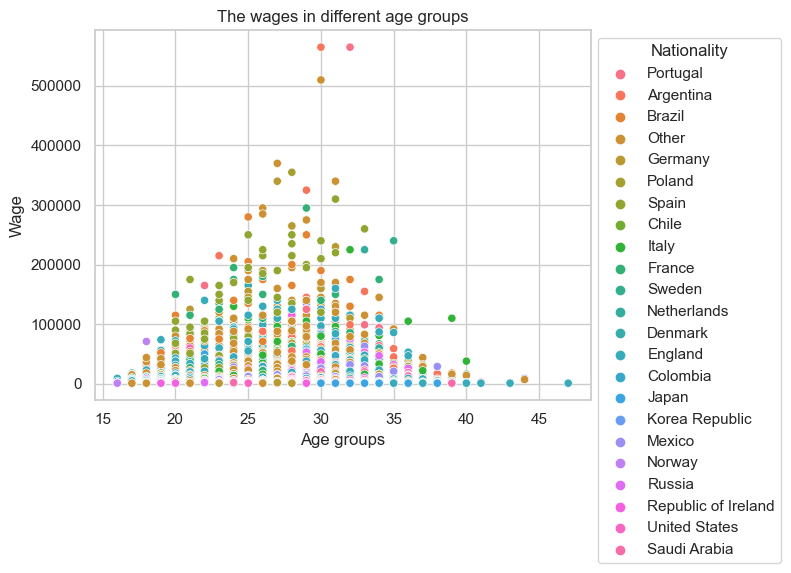

In [319]:

seaborn.set(style='whitegrid')
 
ax = seaborn.scatterplot(x="Age",
                    y="Wage",
                    hue="Nationality",
                    data=df_fifa_2)
seaborn.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.xlabel("Age groups")
plt.ylabel("Wage")
plt.title("The wages in different age groups")

plt.show()

Summary 3 : 

+ ###### The trend for the age groups against wage is first increasing and then decreasing.
+ ###### For the higher wage, it usually goes to the age group between 25 to 30.

Graph 4. The attacking ability for the Top 20 highest-paid players

According to the dataset in sofifa.com, the attacking ability includes:
 + crossing, finishing, heading accuracy, short passing and volleys

In [320]:
col = ['Crossing', 'Finishing', 'Heading accuracy', 'Short passing', 'Volleys'] 

In [321]:
df_plot = df_fifa_1.sort_values(by="Wage",ascending=False)[:20]

display(df_plot[:5])

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,96,83,94,23,91,92,31,80,85,88
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,95,88,85,26,87,73,28,59,90,85
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,93,83,87,38,77,89,45,80,84,88
15,15,G. Bale,27,https://cdn.sofifa.org/48/18/players/173731.png,Wales,https://cdn.sofifa.org/flags/50.png,89,89,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,87,86,91,52,95,76,55,80,79,76
5,5,R. Lewandowski,28,https://cdn.sofifa.org/48/18/players/188545.png,Poland,https://cdn.sofifa.org/flags/37.png,91,91,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,91,83,88,19,83,79,42,84,78,87


###### Find the Top 20 highest-paid players

In [322]:
attack_total = df_plot.loc[:,col].agg("sum", axis="columns")
df_plot['attack_total'] = attack_total

In [323]:
import seaborn

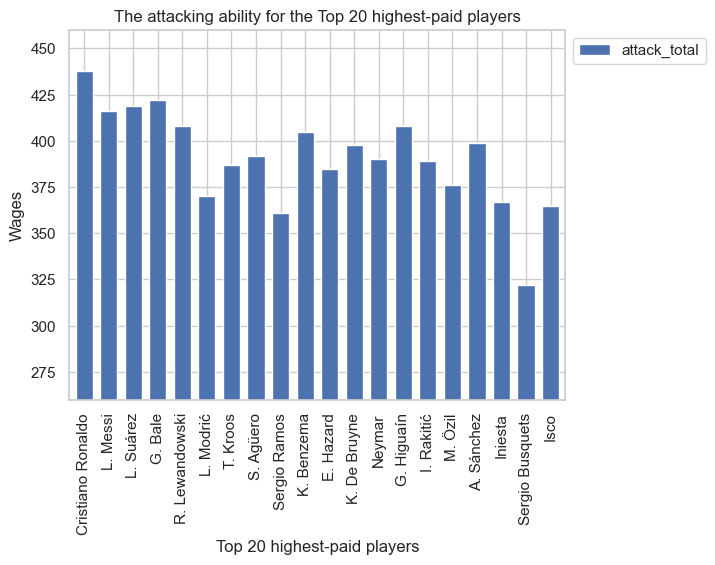

In [324]:
ax = df_plot.plot(x='Name', y='attack_total', kind="bar", width=0.7)
import seaborn as sns
seaborn.move_legend(ax, "upper left", bbox_to_anchor=(1, 1)) 
seaborn.set_palette("Set1")
plt.ylim(260,460)
plt.xlabel("Top 20 highest-paid players")
plt.ylabel("Wages")
plt.title("The attacking ability for the Top 20 highest-paid players")

plt.show()

Summary 4 : 

+ ###### The top 20 highest-paid players usually have high attacking ability.
+ ###### Some of them may be players in other position, so they have a lower attacking ability.

Graph 5. Find the Wage in different nationality and see its relationship with overall value.

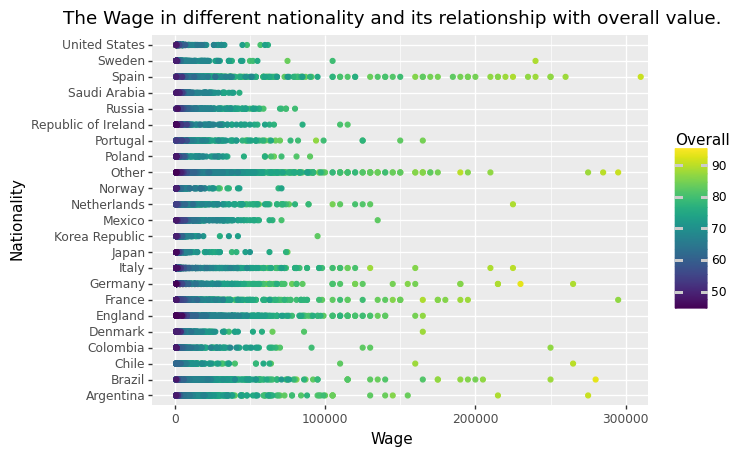

<ggplot: (163510847795)>

In [325]:
from pandas.api.types import CategoricalDtype
from plotnine import *
%matplotlib inline

(ggplot(df_fifa_2)
 + aes(x='Wage', y='Nationality', color='Overall')
 + geom_point()
 + coord_cartesian(xlim=(0,300000))
 + labs(title='The Wage in different nationality and its relationship with overall value.', x='Wage', y='Nationality')
)


Summary 5 : 

+ ###### Most players who has a high wage comes to spain
+ ###### For each nationality, it shows that the increasing potential rating, there is a increasing wage too.

End of the Project